## Contents
1. [import :](#1)
1. [Suppositions:](#2)
1. [Data Visualization:](#3)
1. [Missing Data:](#4)
1. [training:](#5)
1. [Model Evaluation:](#6)
1. [web app](#7)


<div>
    <h2 style="font-family:Serif; color:#d63031; font-size:27px; margin-bottom:0">Introduction : </h2>
        <p  style="font-family:Serif; font-size:17px;">        Actuellement, la technologie a réalisé de grands progrès, nous sommes à un point où les machines sont désormais capables d'exécuter des tâches que nous pensions autrefois que seuls les humains pouvaient faire. Par exemple, pour un ordinateur, prédire le résultat d’un match de foot   aurait été considéré comme de la science-fiction il  y  a  20  ans,  mais  aujourd'hui, c'est une réalité.

Le monde de  la  technologie  englobe  et  touche  à  notre  vie  quotidienne sous divers aspects. Avec la quantité croissante de données générées au jour le jour à travers le monde, Tout est possible à prédire et avec une grande précision.
</p>
</div>

<div>
    <h2 style="font-family:Serif; color:#d63031; font-size:27px; margin-bottom:0">But : </h2>
        <p  style="font-family:Serif; font-size:17px;">       Le football est au cœur de la science des données depuis plus d'une décennie. Si les algorithmes d'aujourd'hui se concentrent sur la détection d'événements, le style de joueur ou l'analyse d'équipe, prédire les résultats d'un match reste un défi ouvert.
Prédire les résultats d'un match entre deux équipes dépend principalement (mais pas seulement) de leur forme actuelle.
 La forme d'une équipe peut être considérée comme sa séquence récente de résultats par rapport aux autres équipes. Ainsi, les probabilités de match entre deux équipes peuvent être différents comptes tenus de leur calendrier.
Cette compétition consiste à prédire les probabilités de plus de 150000 résultats de match en utilisant la séquence récente de 10 matchs des équipes.
</p>
</div>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [4]:
pd.set_option('display.max_columns', None)

df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

C:\Users\lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# - General look at the data structure -
df_train.head()

id target     home_team_name         away_team_name  \
0  11906497   away  Newell's Old Boys            River Plate   
1  11984383   home        Real Estelí  Deportivo Las Sabanas   
2  11983301   draw              UPNFM               Marathón   
3  11983471   away               León                Morelia   
4  11883005   home     Cobán Imperial                 Iztapa   

            match_date       league_name  league_id is_cup  \
0  2019-12-01 00:45:00         Superliga        636  False   
1  2019-12-01 01:00:00  Primera Division        752  False   
2  2019-12-01 01:00:00     Liga Nacional        734  False   
3  2019-12-01 01:00:00           Liga MX        743  False   
4  2019-12-01 01:00:00     Liga Nacional        705  False   

   home_team_coach_id  away_team_coach_id home_team_history_match_date_1  \
0            468196.0            468200.0            2019-11-26 00:10:00   
1            516788.0          22169161.0            2019-11-27 21:00:00   
2           2510608.0            456313.0            2019-11-28 01:15:00   
3           1552508.0            465797.0            2019-11-28 01:00:00   
4            429958.0            426870.0            2019-11-27 18:00:00   

  home_team_history_match_date_2 home_team_history_match_date_3  \
0            2019-11-10 18:30:00            2019-11-03 18:30:00   
1            2019-11-24 01:00:00            2019-11-10 01:00:00   
2            2019-11-21 01:30:00            2019-11-03 21:30:00   
3            2019-11-23 03:10:00            2019-11-10 03:00:00   
4            2019-11-24 01:00:00            2019-11-10 02:00:00   

  home_team_history_match_date_4 home_team_history_match_date_5  \
0            2019-10-29 22:10:00            2019-10-19 20:45:00   
1            2019-11-02 21:30:00            2019-10-27 01:00:00   
2            2019-10-27 01:00:00            2019-10-20 22:00:00   
3            2019-11-04 02:00:00            2019-11-01 03:00:00   
4            2019-11-03 01:00:00            2019-10-27 20:30:00   

  home_team_history_match_date_6 home_team_history_match_date_7  \
0            2019-10-04 22:00:00            2019-09-28 23:00:00   
1            2019-10-24 01:00:00            2019-10-21 00:00:00   
2            2019-10-17 01:00:00            2019-10-05 21:00:00   
3            2019-10-27 01:00:00            2019-10-20 17:00:00   
4            2019-10-24 00:00:00            2019-10-20 18:00:00   

  home_team_history_match_date_8 home_team_history_match_date_9  \
0            2019-09-22 14:00:00            2019-09-15 18:30:00   
1            2019-10-18 01:00:00            2019-10-06 01:00:00   
2            2019-09-29 01:00:00            2019-09-22 22:00:00   
3            2019-10-05 22:00:00            2019-09-28 00:00:00   
4            2019-10-06 17:00:00            2019-10-02 21:30:00   

  home_team_history_match_date_10  home_team_history_is_play_home_1  \
0             2019-09-01 16:15:00                               0.0   
1             2019-09-29 21:00:00                               1.0   
2             2019-09-19 01:00:00                               0.0   
3             2019-09-25 02:00:00                               0.0   
4             2019-09-29 01:00:00                               0.0   

   home_team_history_is_play_home_2  home_team_history_is_play_home_3  \
0                               1.0                               0.0   
1                               0.0                               1.0   
2                               1.0                               0.0   
3                               0.0                               1.0   
4                               1.0                               0.0   

   home_team_history_is_play_home_4  home_team_history_is_play_home_5  \
0                               1.0                               0.0   
1                               0.0                               1.0   
2                               1.0                               0.0   
3                       

In [6]:
# - Taking a look at the number of rows and the variable type of them -
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110938 entries, 0 to 110937
Columns: 190 entries, id to away_team_history_league_id_10
dtypes: float64(162), int64(2), object(26)
memory usage: 160.8+ MB


# 1.1. Suppositions

* **L'équipe locale** a **l'avantage de gagner** le match - en particulier lorsque le match se déroule dans une coupe.

* **Premiers** quelques **matchs du nouvel entraîneur** l'équipe sera **moins performante**.

* Plus l'équipe est reposée, plus elle est performante.

* Victoire/défaite **La série va se poursuivre**.

* **rating**  des** jeux précédents** influenceront** également

* l'identité de la ligue n'est pas si importante

In [7]:
# - Auxiliar functions -

# get the name of the winning team
def column_winner(row):
    if row['target']=='away':
        return row['away_team_name']
    elif row['target']=='home':
        return row['home_team_name']
    else:
        return 'draw'


 # get the name of the losing team
def column_loser(row):
    if row['target']=='away':
        return row['home_team_name']
    elif row['target']=='home':
        return row['away_team_name']
    else:
        return 'draw'


# when the currently coach joined the team
def time_coach(row,h_a):
    coach_id = row['{}_team_coach_id'.format(h_a)]
    time = 1
    for match in range(1,11):
        if row['{}_team_history_coach_{}'.format(h_a,match)]==coach_id:
            time = time+1
        elif np.isnan(row['{}_team_history_coach_{}'.format(h_a,match)]):
            time = np.nan
            break
        else:
            break
    return time

# t - (t-1)
def time_elapsed_between_matches(row,match_id, h_a):
    if match_id==1:
        time_elapsed = row['match_date'] - row['{}_team_history_match_date_1'.format(h_a)]
    else:
        time_elapsed = row['{}_team_history_match_date_{}'.format(h_a,match_id-1)] - row['{}_team_history_match_date_{}'.format(h_a,match_id)]
    
    return time_elapsed.total_seconds()

# rest score using the sum of (1-alpha)^(period)*(rest_time) -> rest in recent matches have bigger weight on the score
def rest_score(row,h_a,alpha):
    score = 0
    for hist in range(1,11):
        if hist==1:
            score = alpha*row['{}_rest_time_{}'.format(h_a,hist)]
        else:
            score = score + (((1-alpha)**(hist-1))*row['{}_rest_time_{}'.format(h_a,hist)])

    return score

# History Match Result ---- If they scored more goals then conceived -> win, if it's equal -> draw, if they conceived more -> loss
def win_loss_history(row,h_a,hist):
    goals_scored = row['{}_team_history_goal_{}'.format(h_a,hist)]
    goals_conceived = row['{}_team_history_opponent_goal_{}'.format(h_a,hist)]
    
    if goals_scored==goals_conceived:
        return 'draw'
    elif goals_scored>goals_conceived:
        return 'win'
    else:
        return 'loss'

    
    # Functions to calculate the result streak
def win_streak(row,h_a):
    streak=0
    for hist in range(1,11):
        if row['{}_match_result_{}'.format(h_a,hist)]=='win':
            streak=streak+1
        else:
            break
    return streak
#---------------
def loss_streak(row,h_a):
    streak=0
    for hist in range(1,11):
        if row['{}_match_result_{}'.format(h_a,hist)]=='loss':
            streak=streak+1
        else:
            break
    return streak
#---------------
def draw_streak(row,h_a):
    streak=0
    for hist in range(1,11):
        if row['{}_match_result_{}'.format(h_a,hist)]=='draw':
            streak=streak+1
        else:
            break
    return streak

# Calculating points of the last games - draw = +1 -> win = +3 -> loss = +0
def point_matches(row,h_a):
    point=0
    for hist in range(1,11):
        if row['{}_match_result_{}'.format(h_a,hist)]=='draw':
            point=point+1
        elif row['{}_match_result_{}'.format(h_a,hist)]=='win':
            point = point+3
    
    return point

# - Function for creating new variables on the dataframe based on our assumptions - Bringing all pother functions together 
def new_variables(df, type_df = 'train'):
    new_df = df.copy()
    
    # transforming match_date to datetime
    new_df['match_date'] = pd.to_datetime(new_df['match_date'])
    
    # Creating column with the winning and losing team
    if type_df=='train':
        new_df['winning_team'] = new_df.apply(column_winner, axis=1)
        new_df['losing_team'] = new_df.apply(column_loser, axis=1)
        
     # looping through 'home' and 'away' team
    for h_a in ['home','away']:
        # getting match time with the currently coach
        new_df['time_{}_coach'.format(h_a)] = new_df.apply(time_coach, h_a=h_a, axis=1)
        for time in range(1,11):
            # Transforming to datetime the history matches
            new_df['{}_team_history_match_date_{}'.format(h_a,time)] = pd.to_datetime(new_df['{}_team_history_match_date_{}'.format(h_a,time)])
            # Calculating the time elapsed between matches
            new_df['{}_rest_time_{}'.format(h_a,time)] = new_df.apply(time_elapsed_between_matches,args=(time,h_a), axis=1)
            # Getting the result of history matches
            new_df['{}_match_result_{}'.format(h_a,time)] = new_df.apply(win_loss_history, args=(h_a,time), axis=1)
    
    # looping through 'home' and 'away' team again
    for h_a in ['home','away']:
        # Calcuating the rest score for the currently game
        new_df['{}_rest_score'.format(h_a)] = new_df.apply(rest_score,args=(h_a,0.6),axis=1)
        # Calculating the result streak
        new_df['{}_win_streak'.format(h_a)] = new_df.apply(win_streak,h_a=h_a,axis=1)
        new_df['{}_loss_streak'.format(h_a)] = new_df.apply(loss_streak,h_a=h_a,axis=1)
        new_df['{}_draw_streak'.format(h_a)] = new_df.apply(draw_streak,h_a=h_a,axis=1)
        # Calculating points of the last games
        new_df['{}_last_points'.format(h_a)] = new_df.apply(point_matches,h_a=h_a,axis=1)
        
     # create column if match is a friendly or not
    new_df['Friendly'] = 0
    new_df.loc[new_df['league_name']=='Club Friendlies','Friendly'] = 1
    
    return new_df

In [8]:
# Calling the previous function
df_train = new_variables(df_train)

<h1>2. Data Visualization</h1>

Analyse visuelle de notre ensemble de données pour vérifier si nos hypothèses sont correctes.

Analyse s'il y a d'autres relations que nous aurions pu oublier.


In [9]:
# First config for our plots
sns.set_palette("Dark2_r")
sns.set_style("whitegrid")

In [10]:
df_train.head()

id target     home_team_name         away_team_name  \
0  11906497   away  Newell's Old Boys            River Plate   
1  11984383   home        Real Estelí  Deportivo Las Sabanas   
2  11983301   draw              UPNFM               Marathón   
3  11983471   away               León                Morelia   
4  11883005   home     Cobán Imperial                 Iztapa   

           match_date       league_name  league_id is_cup  home_team_coach_id  \
0 2019-12-01 00:45:00         Superliga        636  False            468196.0   
1 2019-12-01 01:00:00  Primera Division        752  False            516788.0   
2 2019-12-01 01:00:00     Liga Nacional        734  False           2510608.0   
3 2019-12-01 01:00:00           Liga MX        743  False           1552508.0   
4 2019-12-01 01:00:00     Liga Nacional        705  False            429958.0   

   away_team_coach_id home_team_history_match_date_1  \
0            468200.0            2019-11-26 00:10:00   
1          22169161.0            2019-11-27 21:00:00   
2            456313.0            2019-11-28 01:15:00   
3            465797.0            2019-11-28 01:00:00   
4            426870.0            2019-11-27 18:00:00   

  home_team_history_match_date_2 home_team_history_match_date_3  \
0            2019-11-10 18:30:00            2019-11-03 18:30:00   
1            2019-11-24 01:00:00            2019-11-10 01:00:00   
2            2019-11-21 01:30:00            2019-11-03 21:30:00   
3            2019-11-23 03:10:00            2019-11-10 03:00:00   
4            2019-11-24 01:00:00            2019-11-10 02:00:00   

  home_team_history_match_date_4 home_team_history_match_date_5  \
0            2019-10-29 22:10:00            2019-10-19 20:45:00   
1            2019-11-02 21:30:00            2019-10-27 01:00:00   
2            2019-10-27 01:00:00            2019-10-20 22:00:00   
3            2019-11-04 02:00:00            2019-11-01 03:00:00   
4            2019-11-03 01:00:00            2019-10-27 20:30:00   

  home_team_history_match_date_6 home_team_history_match_date_7  \
0            2019-10-04 22:00:00            2019-09-28 23:00:00   
1            2019-10-24 01:00:00            2019-10-21 00:00:00   
2            2019-10-17 01:00:00            2019-10-05 21:00:00   
3            2019-10-27 01:00:00            2019-10-20 17:00:00   
4            2019-10-24 00:00:00            2019-10-20 18:00:00   

  home_team_history_match_date_8 home_team_history_match_date_9  \
0            2019-09-22 14:00:00            2019-09-15 18:30:00   
1            2019-10-18 01:00:00            2019-10-06 01:00:00   
2            2019-09-29 01:00:00            2019-09-22 22:00:00   
3            2019-10-05 22:00:00            2019-09-28 00:00:00   
4            2019-10-06 17:00:00            2019-10-02 21:30:00   

  home_team_history_match_date_10  home_team_history_is_play_home_1  \
0             2019-09-01 16:15:00                               0.0   
1             2019-09-29 21:00:00                               1.0   
2             2019-09-19 01:00:00                               0.0   
3             2019-09-25 02:00:00                               0.0   
4             2019-09-29 01:00:00                               0.0   

   home_team_history_is_play_home_2  home_team_history_is_play_home_3  \
0                               1.0                               0.0   
1                               0.0                               1.0   
2                               1.0                               0.0   
3                               0.0                               1.0   
4                               1.0                               0.0   

   home_team_history_is_play_home_4  home_team_history_is_play_home_5  \
0                               1.0                               0.0   
1                               0.0                               1.0   
2                               1.0                               0.0   
3                             

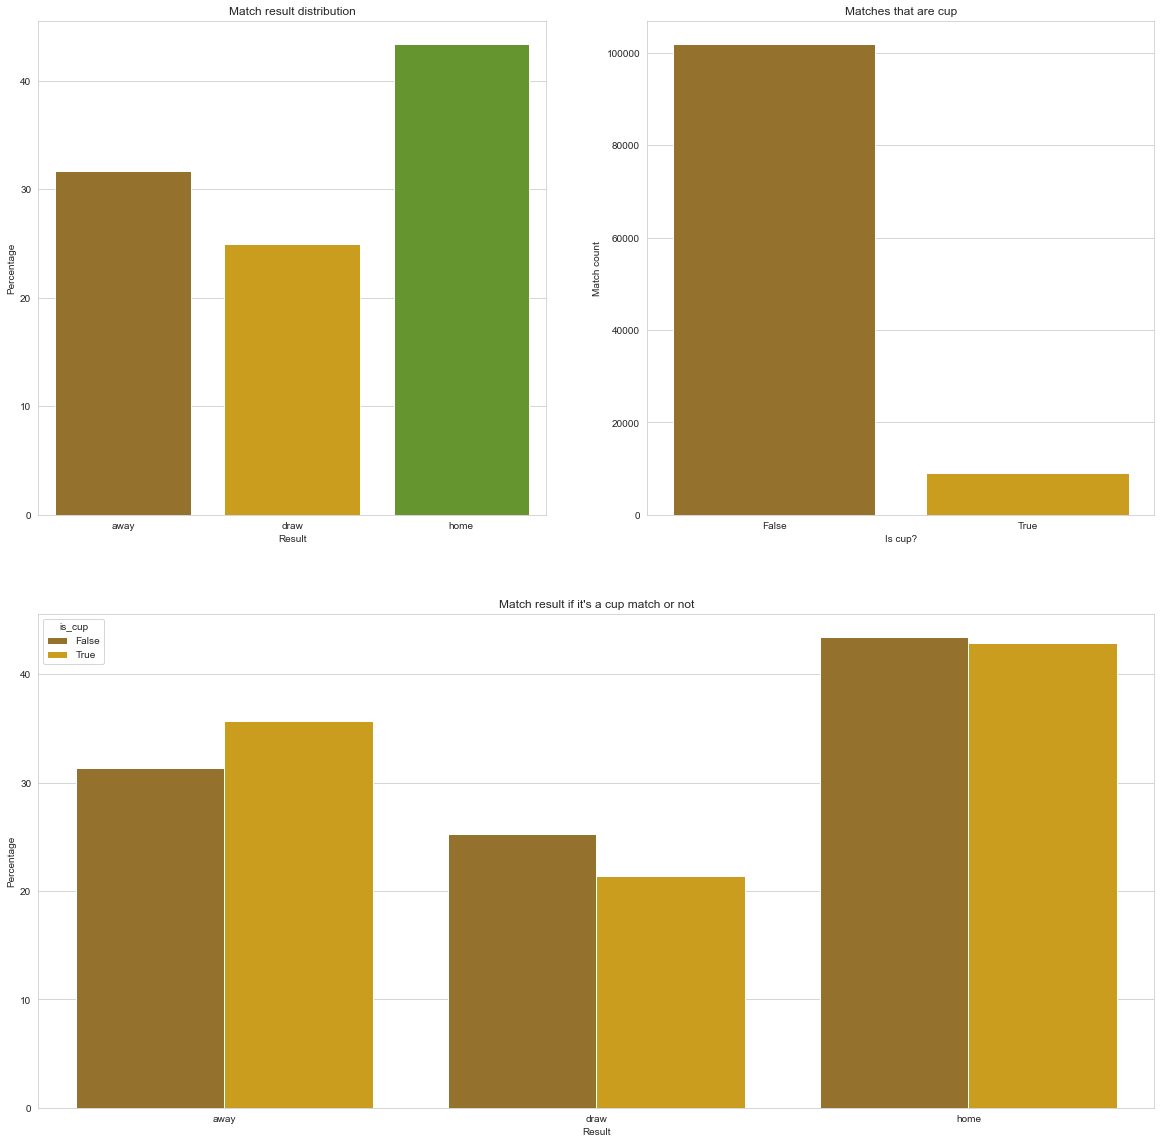

In [11]:
plt.figure(figsize=(20,20))
g = gridspec.GridSpec(2,2)

ax1= plt.subplot(g[0,0])
ax2= plt.subplot(g[0,1])
ax3= plt.subplot(g[1,:])
axs=[ax1,ax2,ax3]

# Count for each type of Result

cnt_target = df_train['target'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('index')
sns.barplot(x='index',y='Percentage',data=cnt_target,ax=axs[0]).set(title="Match result distribution",ylabel='Percentage',xlabel='Result')


# Matches if is cup or not

sns.countplot(x='is_cup',data=df_train,ax=axs[1]).set(title="Matches that are cup",ylabel='Match count',xlabel='Is cup?')


# Result per home and away team

impact_cup = df_train.groupby(['is_cup'])['target'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('target')
ax = sns.barplot(x='target',y='percentage',hue='is_cup',data=impact_cup,ax=axs[2]).set(title="Match result if it's a cup match or not",ylabel='Percentage',xlabel='Result')
plt.show()

In [12]:
# Number of teams
#print("There are {} teams on the training dataset".format(pd.concat([df_train['home_team_name'],df_train['away_team_name']]).unique().shape[0]))

# concatenating the DataFrames
mul = df_train.home_team_name.append(df_train.away_team_name, ignore_index = True)
print("There are {} teams on the training dataset".format(len(mul.unique())))


There are 10215 teams on the training dataset


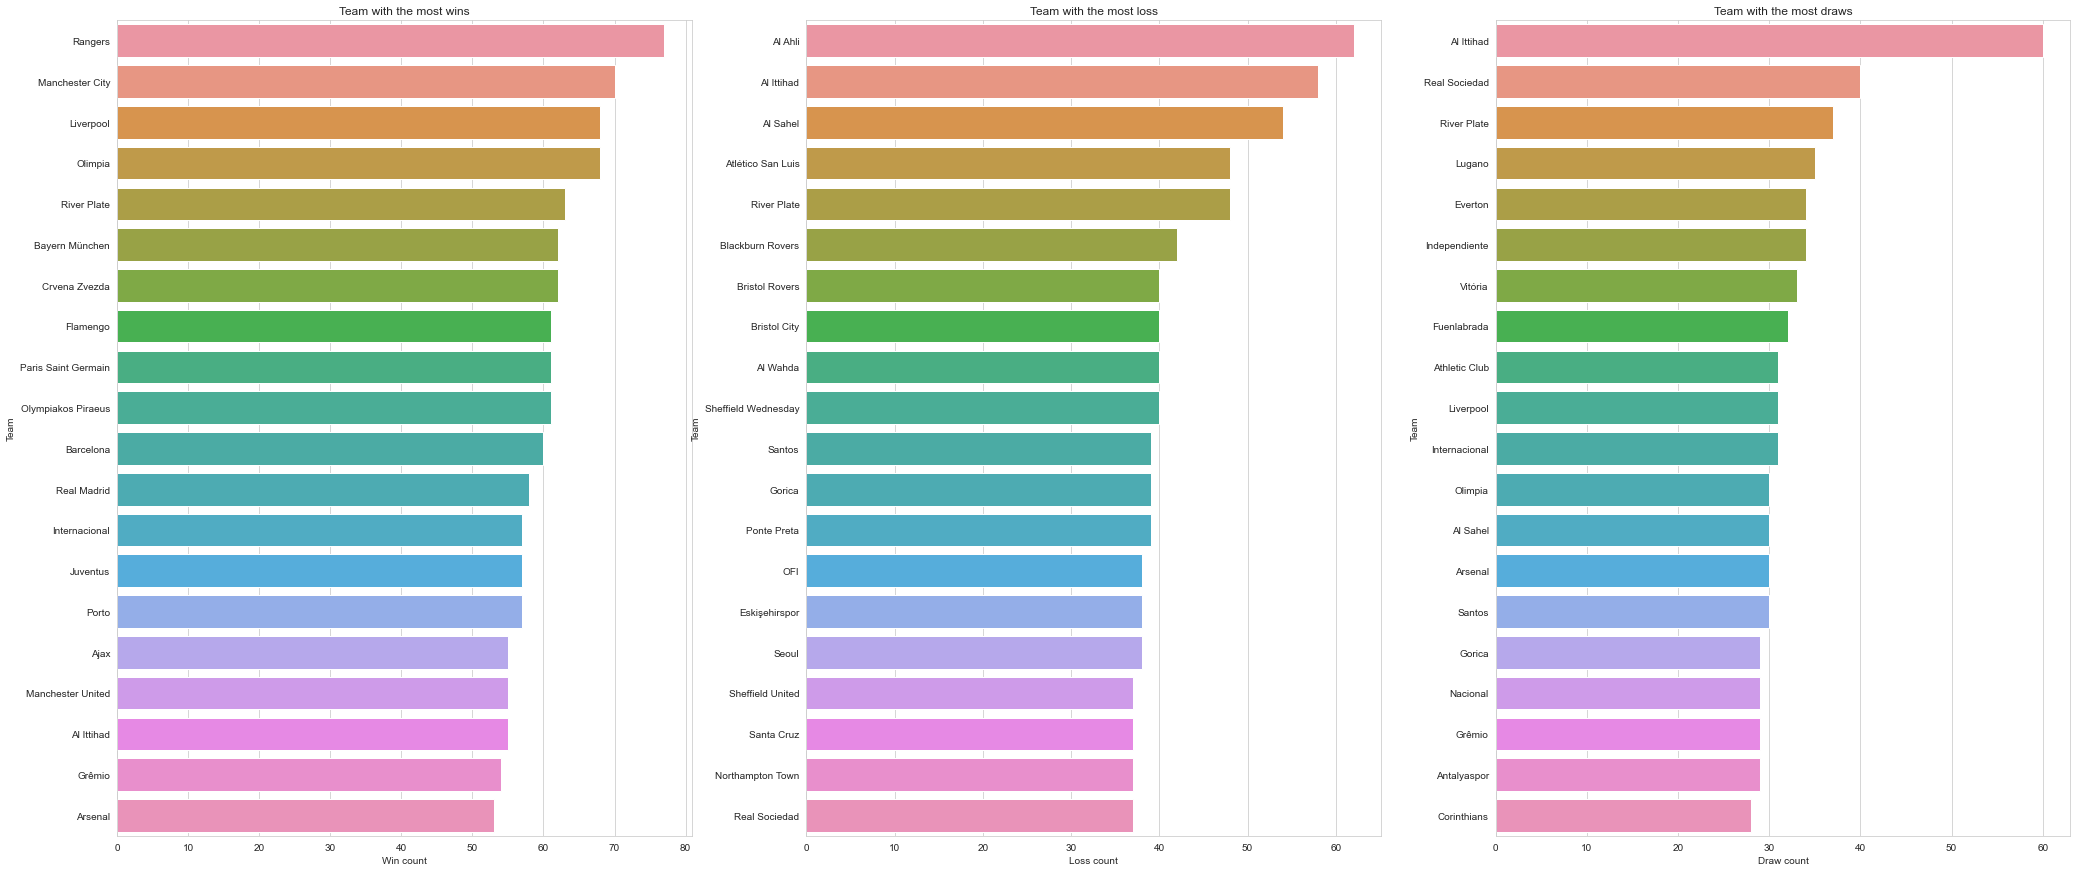

In [13]:
# Teams with most wins/loss/draws
fig, axs = plt.subplots(ncols=3,figsize=(35,15))
df_without_draw = df_train.loc[df_train['winning_team']!='draw',:]
df_draw = df_train.loc[df_train['winning_team']=='draw',:]


# win per team
grouped_wins = df_without_draw.groupby(['league_name'])['winning_team'].value_counts().rename('value').reset_index().sort_values(by='value')
aux_wins = grouped_wins.groupby(['winning_team'])['value'].sum().reset_index().sort_values(by='value', ascending=False).head(20)
sns.barplot(y='winning_team',x='value',data=aux_wins, ax=axs[0]).set(title="Team with the most wins",ylabel='Team',xlabel='Win count')


# loss per team
grouped_loss = df_without_draw.groupby(['league_name'])['losing_team'].value_counts().rename('value').reset_index().sort_values(by='value')
aux_loss = grouped_loss.groupby(['losing_team'])['value'].sum().reset_index().sort_values(by='value', ascending=False).head(20)
sns.barplot(y='losing_team',x='value',data=aux_loss, ax=axs[1]).set(title="Team with the most loss",ylabel='Team',xlabel='Loss count')

# draw per team
aux_draw = pd.concat([df_draw['home_team_name'],df_draw['away_team_name']]).value_counts().rename('value').reset_index().sort_values(by='value',ascending=False).head(20)
sns.barplot(y='index',x='value',data=aux_draw, ax=axs[2]).set(title="Team with the most draws",ylabel='Team',xlabel='Draw count')
plt.show()

There are 727 leagues on the training dataset


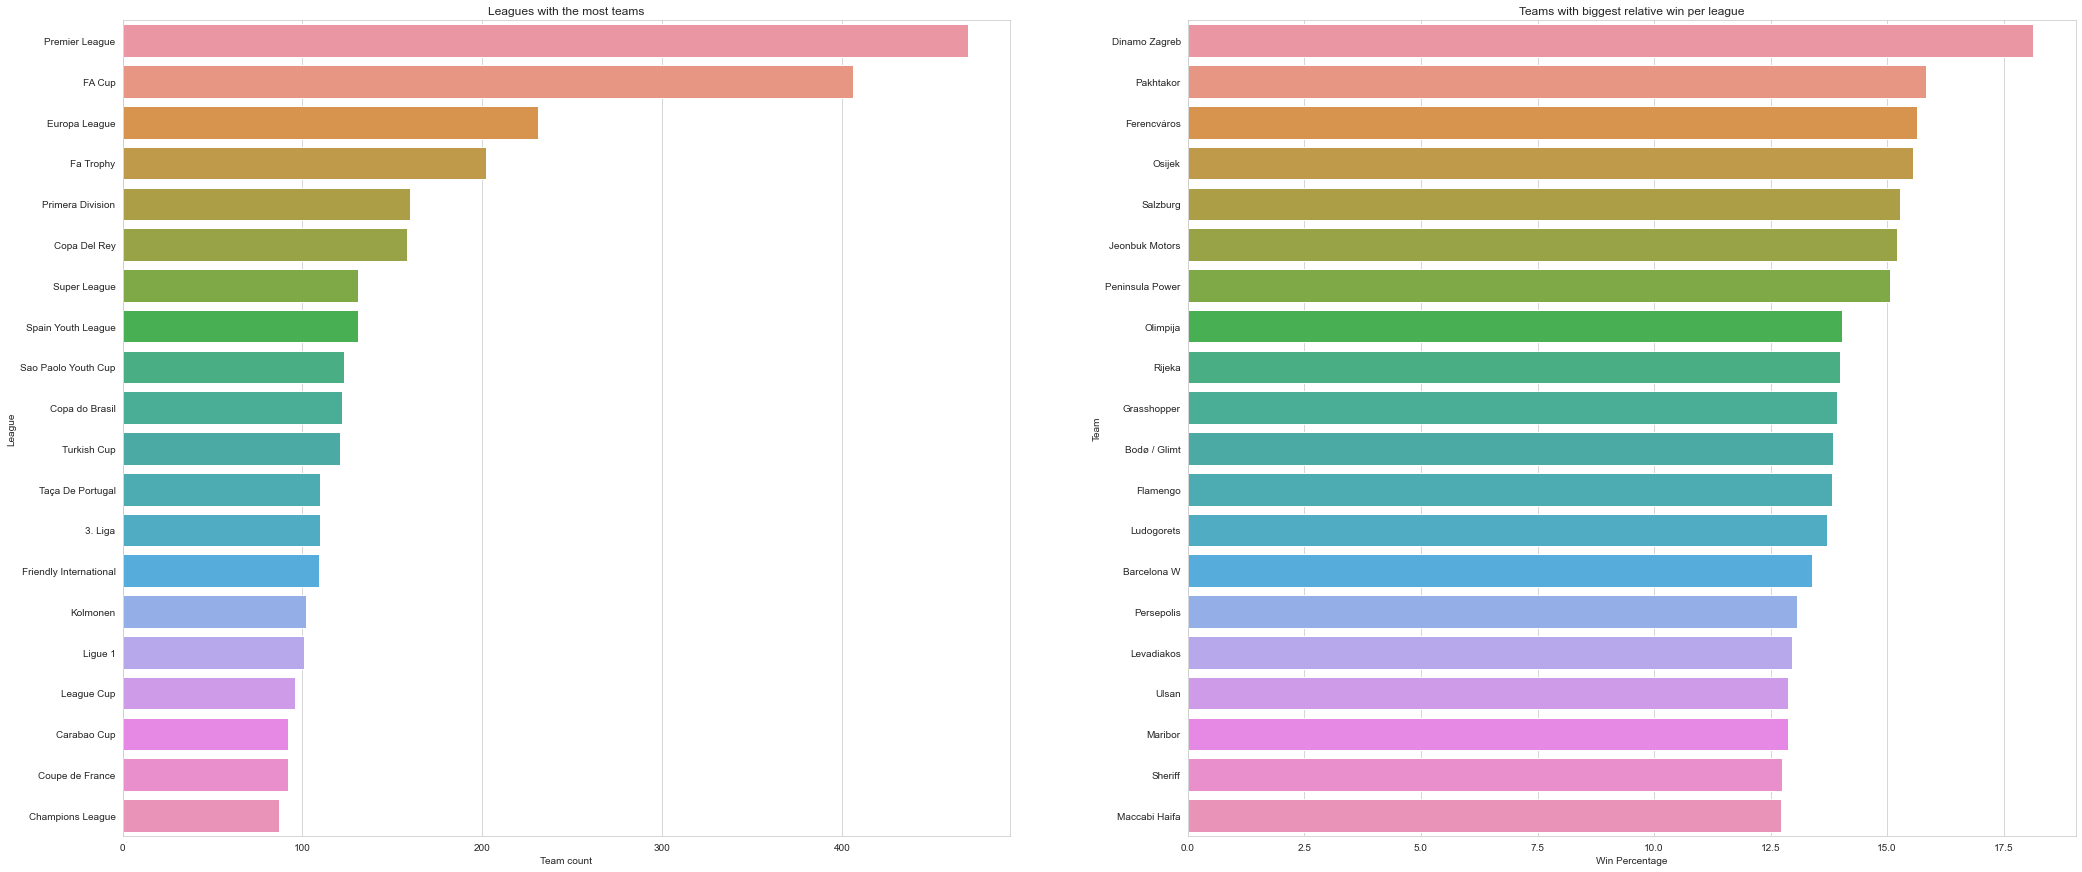

In [14]:
aux_team_league = pd.concat([df_train[['home_team_name','league_name']].rename(columns={"home_team_name": "team"}),df_train[['away_team_name','league_name']].rename(columns={"away_team_name": "team"})]).drop_duplicates()

fig, axs = plt.subplots(ncols=2,figsize=(35,15))
# Number of teams per league
group_league = aux_team_league.groupby(['league_name'])['team'].count().rename('value').reset_index().sort_values(by='value',ascending=False)
group_league = group_league.loc[group_league['league_name']!='Club Friendlies',:].head(20)
sns.barplot(y='league_name',x='value',data=group_league, ax=axs[0]).set(title="Leagues with the most teams",ylabel='League',xlabel='Team count')

# Number of leagues
print("There are {} leagues on the training dataset".format(aux_team_league['league_name'].unique().shape[0]-1))


# teamns with the most wins per each league (percentage) filter the leagues that have more than 200 matches
grouped_teams = pd.concat([df_train[['home_team_name','league_name']].rename(columns={"home_team_name": "team"}),df_train[['away_team_name','league_name']].rename(columns={"away_team_name": "team"})])
leagues_with_matches = grouped_teams.groupby(['league_name']).count().rename(columns={"team": "matches"}).sort_values(by='matches', ascending=False)
leagues_with_matches['matches'] = leagues_with_matches['matches']/2
leagues_with_matches = leagues_with_matches.loc[leagues_with_matches['matches']>200,:]
aux_win_league = df_without_draw.loc[df_without_draw['league_name'].isin(leagues_with_matches.index),:].groupby(['league_name'])['winning_team'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values(by='Percentage',ascending=False).head(20)
sns.barplot(y='winning_team',x='Percentage',data=aux_win_league, ax=axs[1]).set(title="Teams with biggest relative win per league",ylabel='Team',xlabel='Win Percentage')
plt.show()

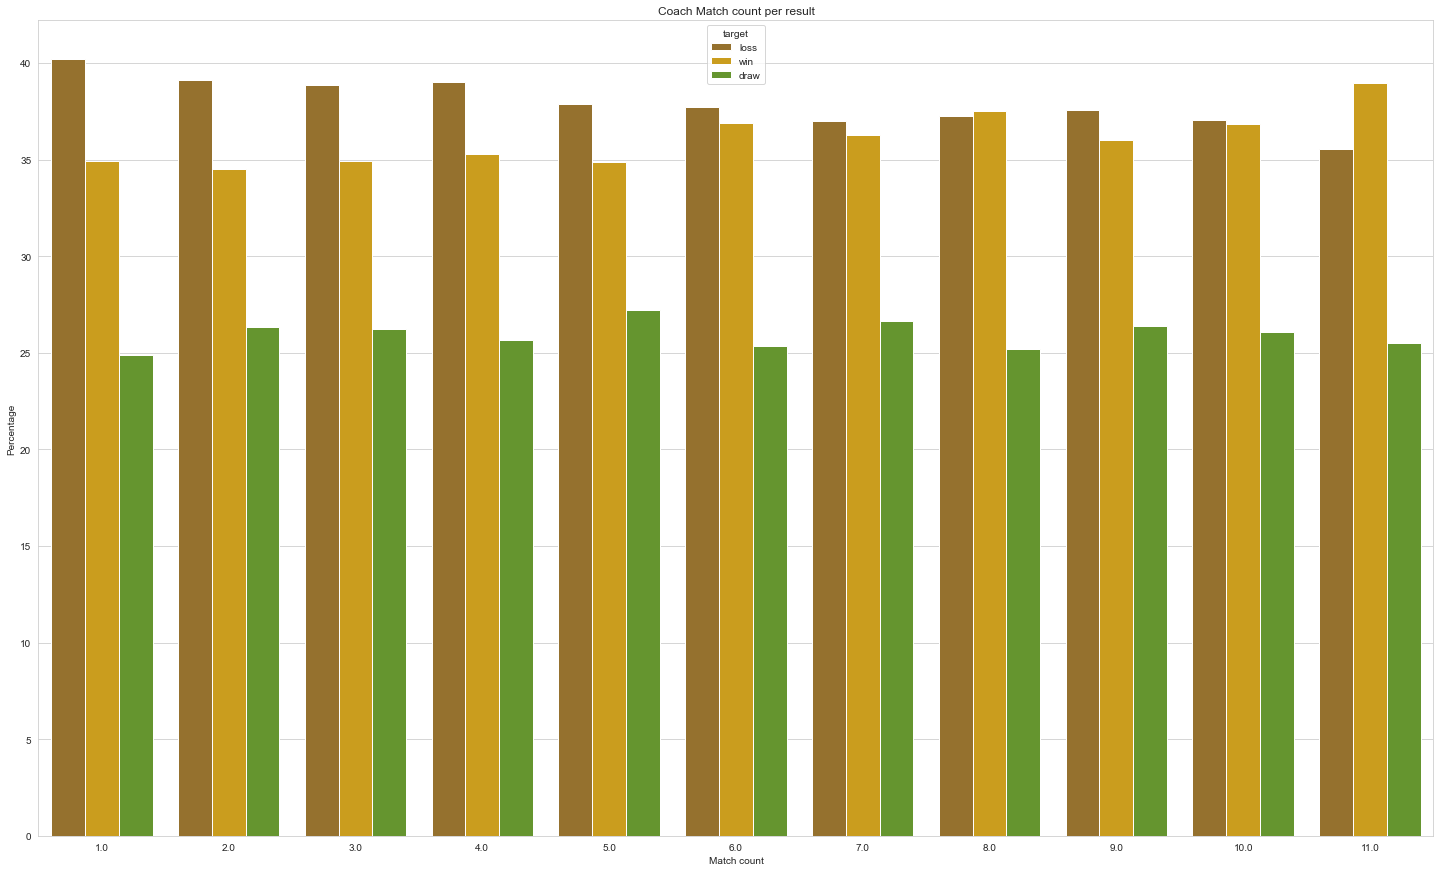

In [15]:
fig, ax = plt.subplots(figsize=(25,15))
# time of coach per result
home_team = df_train.loc[:,['target','time_home_coach']]
home_team.loc[home_team['target']=='home','target']='win'
home_team.loc[home_team['target']=='away','target']='loss'
away_team = df_train.loc[:,['target','time_away_coach']]
away_team.loc[away_team['target']=='away','target']='win'
away_team.loc[away_team['target']=='home','target']='loss'
grouped_coach = pd.concat([home_team.rename(columns={"time_home_coach": "time_coach"}),away_team.rename(columns={"time_away_coach": "time_coach"})]).reset_index()
grouped_coach = grouped_coach.groupby(['time_coach'])['target'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index()
sns.barplot(data=grouped_coach,x='time_coach',y='Percentage',hue='target',ax=ax).set(title="Coach Match count per result",xlabel='Match count')
plt.show()

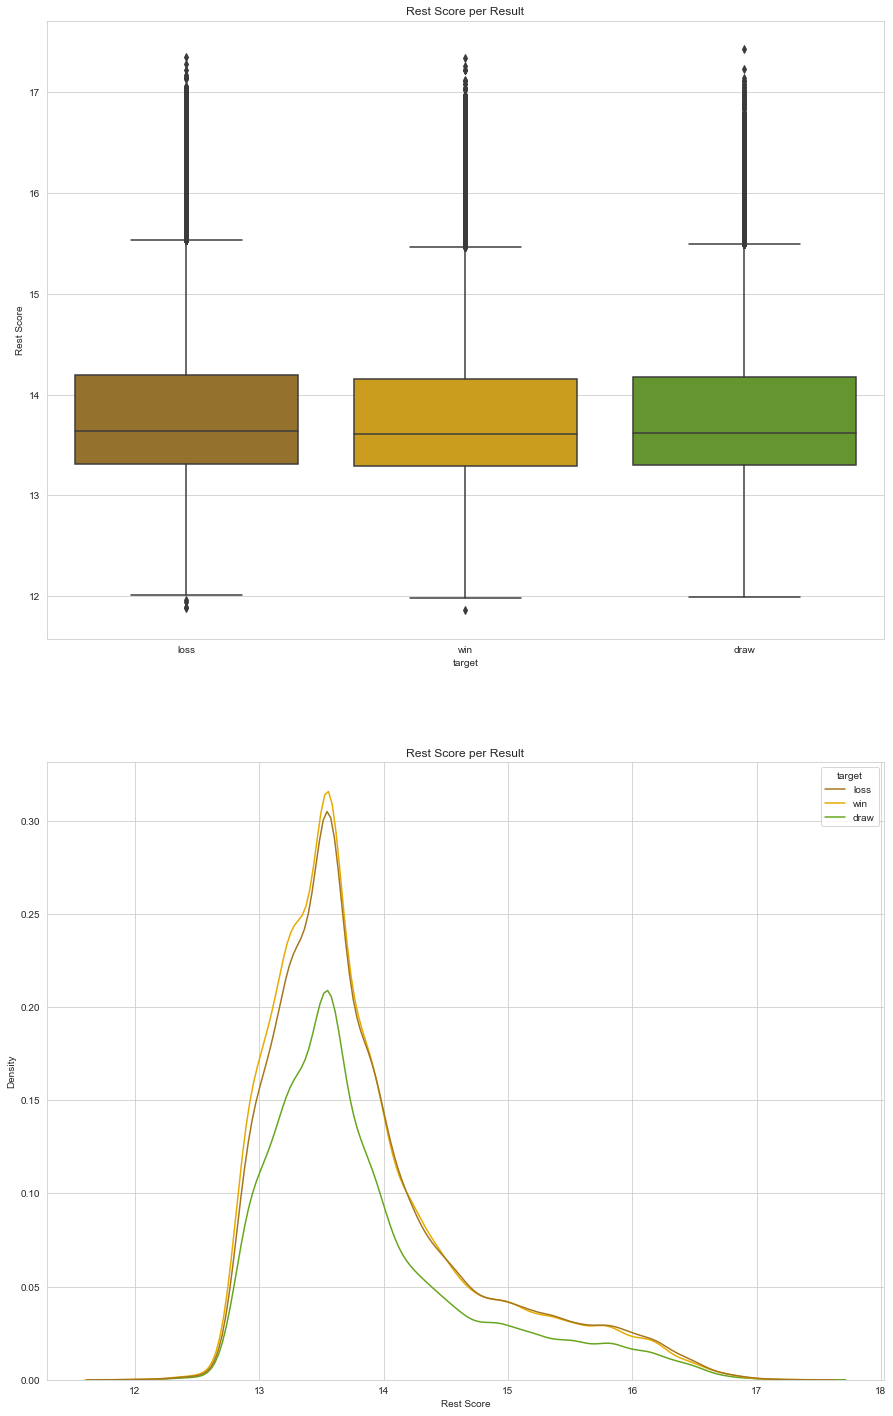

In [16]:
fig, axs = plt.subplots(nrows=2,figsize=(15,25))
# rest score per result
home_rest = df_train.loc[:,['target','home_rest_score']]
home_rest.loc[home_rest['target']=='home','target']='win'
home_rest.loc[home_rest['target']=='away','target']='loss'
away_rest = df_train.loc[:,['target','away_rest_score']]
away_rest.loc[away_rest['target']=='away','target']='win'
away_rest.loc[away_rest['target']=='home','target']='loss'
grouped_rest = pd.concat([home_rest.rename(columns={"home_rest_score": "rest_score"}),away_rest.rename(columns={"away_rest_score": "rest_score"})]).reset_index()
grouped_rest['rest_score'] = np.log(grouped_rest['rest_score'])
sns.boxplot(data=grouped_rest,y='rest_score',x='target',ax=axs[0]).set(title="Rest Score per Result",ylabel='Rest Score')
sns.kdeplot(data=grouped_rest,x='rest_score',hue='target',ax=axs[1]).set(title="Rest Score per Result",xlabel='Rest Score')
plt.show()

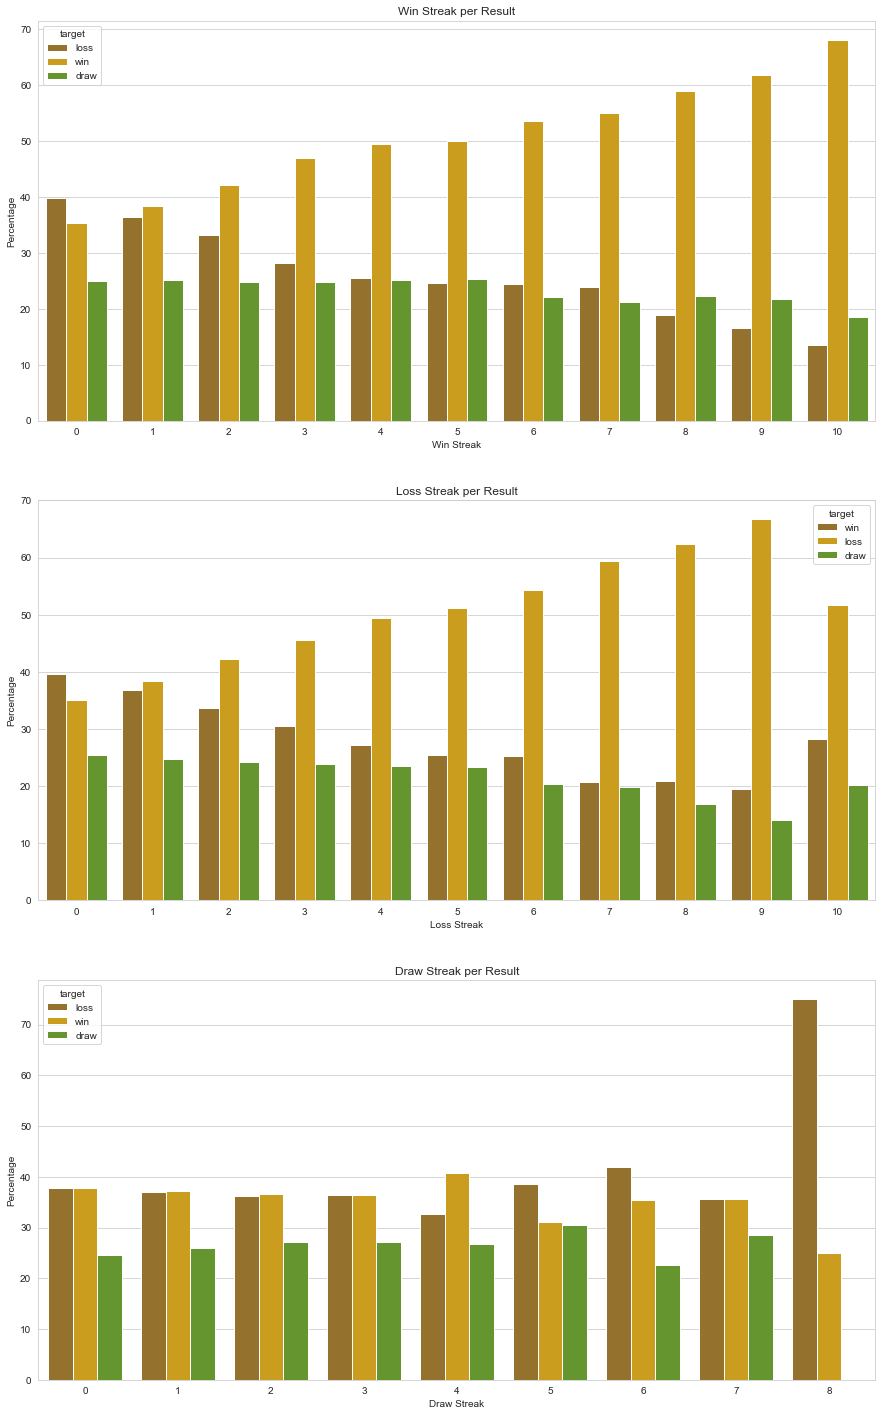

In [17]:
fig, axs = plt.subplots(nrows=3,figsize=(15,25))
# streak per result
home_streak = df_train.loc[:,['target','home_win_streak','home_loss_streak','home_draw_streak']]
home_streak.loc[home_streak['target']=='home','target']='win'
home_streak.loc[home_streak['target']=='away','target']='loss'
away_streak = df_train.loc[:,['target','away_win_streak','away_loss_streak','away_draw_streak']]
away_streak.loc[away_streak['target']=='away','target']='win'
away_streak.loc[away_streak['target']=='home','target']='loss'
grouped_streak = pd.concat([home_streak.rename(columns={"home_win_streak": "win_streak","home_loss_streak": "loss_streak","home_draw_streak": "draw_streak"}),away_streak.rename(columns={"away_win_streak": "win_streak","away_loss_streak": "loss_streak","away_draw_streak": "draw_streak"})]).reset_index()
grouped_win_streak = grouped_streak.groupby(['win_streak'])['target'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index()
sns.barplot(data=grouped_win_streak,x='win_streak',y='Percentage',hue='target',ax=axs[0]).set(title="Win Streak per Result",xlabel='Win Streak')

grouped_loss_streak = grouped_streak.groupby(['loss_streak'])['target'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index()
sns.barplot(data=grouped_loss_streak,x='loss_streak',y='Percentage',hue='target',ax=axs[1]).set(title="Loss Streak per Result",xlabel='Loss Streak')

grouped_draw_streak = grouped_streak.groupby(['draw_streak'])['target'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index()
sns.barplot(data=grouped_draw_streak,x='draw_streak',y='Percentage',hue='target',ax=axs[2]).set(title="Draw Streak per Result",xlabel='Draw Streak')
plt.show()

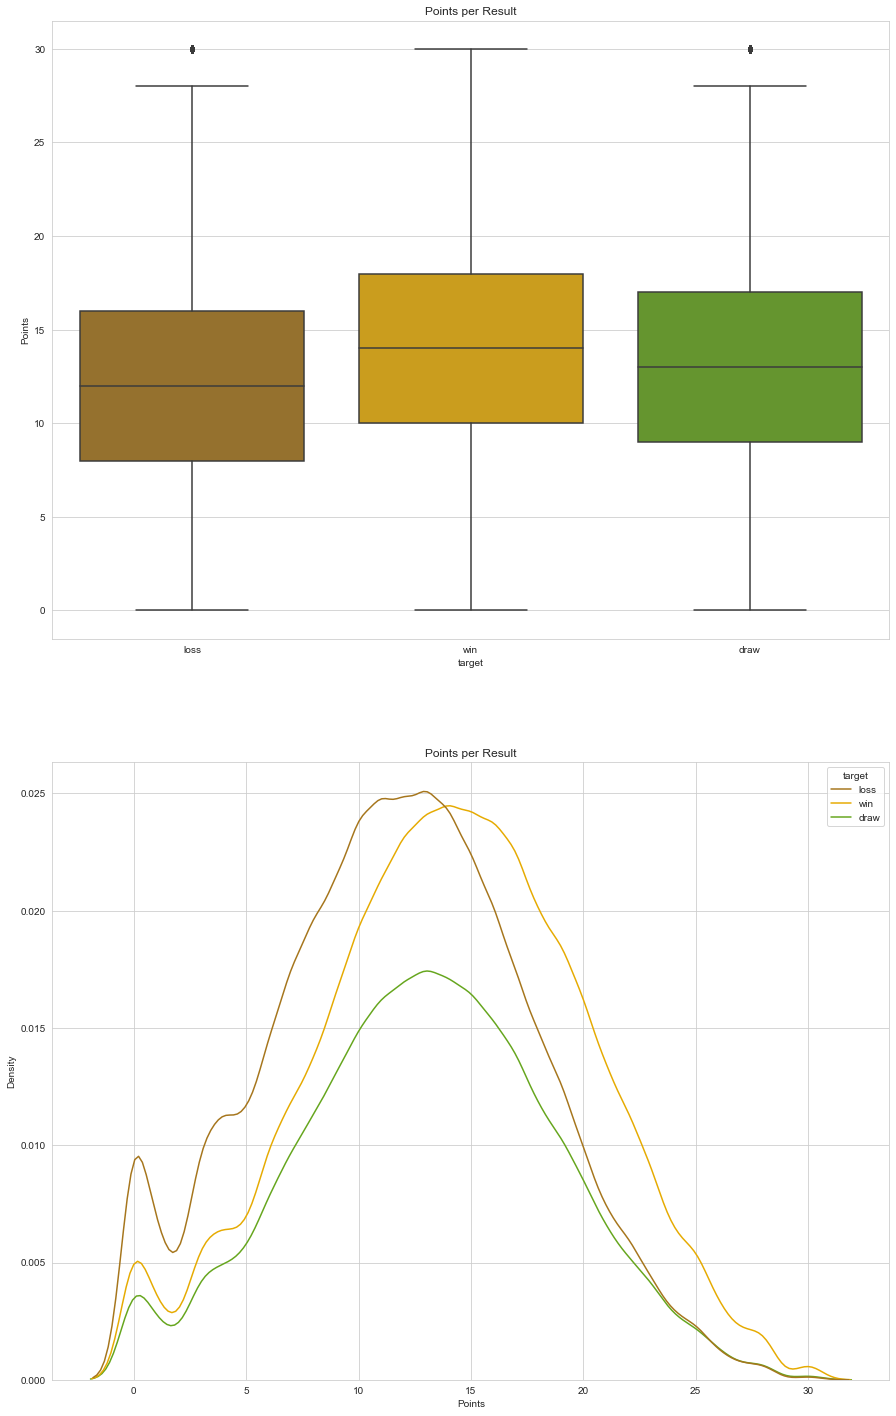

In [18]:
fig, axs = plt.subplots(nrows=2,figsize=(15,25))
# point per result
home_point = df_train.loc[:,['target','home_last_points']]
home_point.loc[home_point['target']=='home','target']='win'
home_point.loc[home_point['target']=='away','target']='loss'
away_point = df_train.loc[:,['target','away_last_points']]
away_point.loc[away_point['target']=='away','target']='win'
away_point.loc[away_point['target']=='home','target']='loss'
grouped_point = pd.concat([home_point.rename(columns={"home_last_points": "points"}),away_point.rename(columns={"away_last_points": "points"})]).reset_index()

sns.boxplot(data=grouped_point,y='points',x='target',ax=axs[0]).set(title="Points per Result",ylabel='Points')

sns.kdeplot(data=grouped_point,x='points',hue='target',ax=axs[1]).set(title="Points per Result",xlabel='Points')
plt.show()

<h2>Conclusions</h2>

Il y a plus de chances de gagner quand on joue à domicile.

Lorsqu'un match est une coupe, il y a moins de matchs nuls - peut-être que les équipes prennent plus de risques.

Lors des premiers matchs d'un nouvel entraîneur, les chances de perdre sont plus élevées.

Il n'y a pas de relation entre le score de repos et les chances de gagner ou de perdre.

Plus la série de victoires ou de défaites est importante, plus la probabilité que la série se poursuive est grande.

Il existe une relation entre les points des derniers matchs et le résultat du match.



<h1>3. Missing Data</h1>

Examiner les données manquantes

Créer un plan pour traiter ces valeurs manquantes

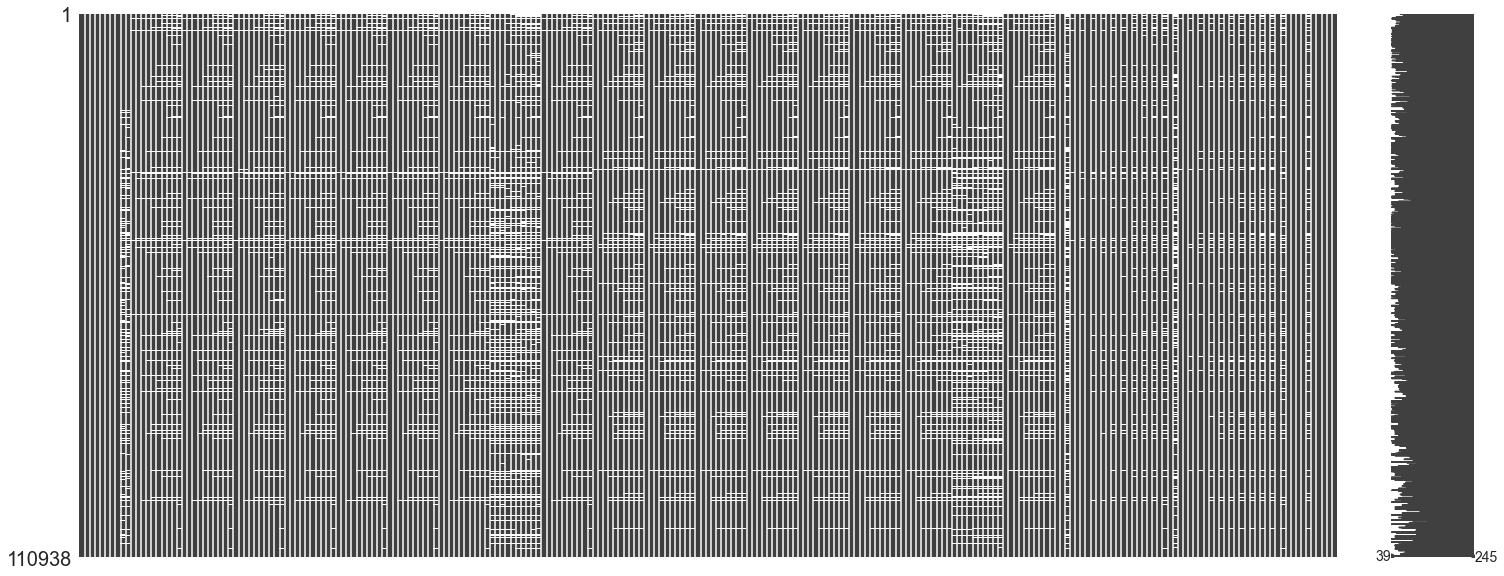

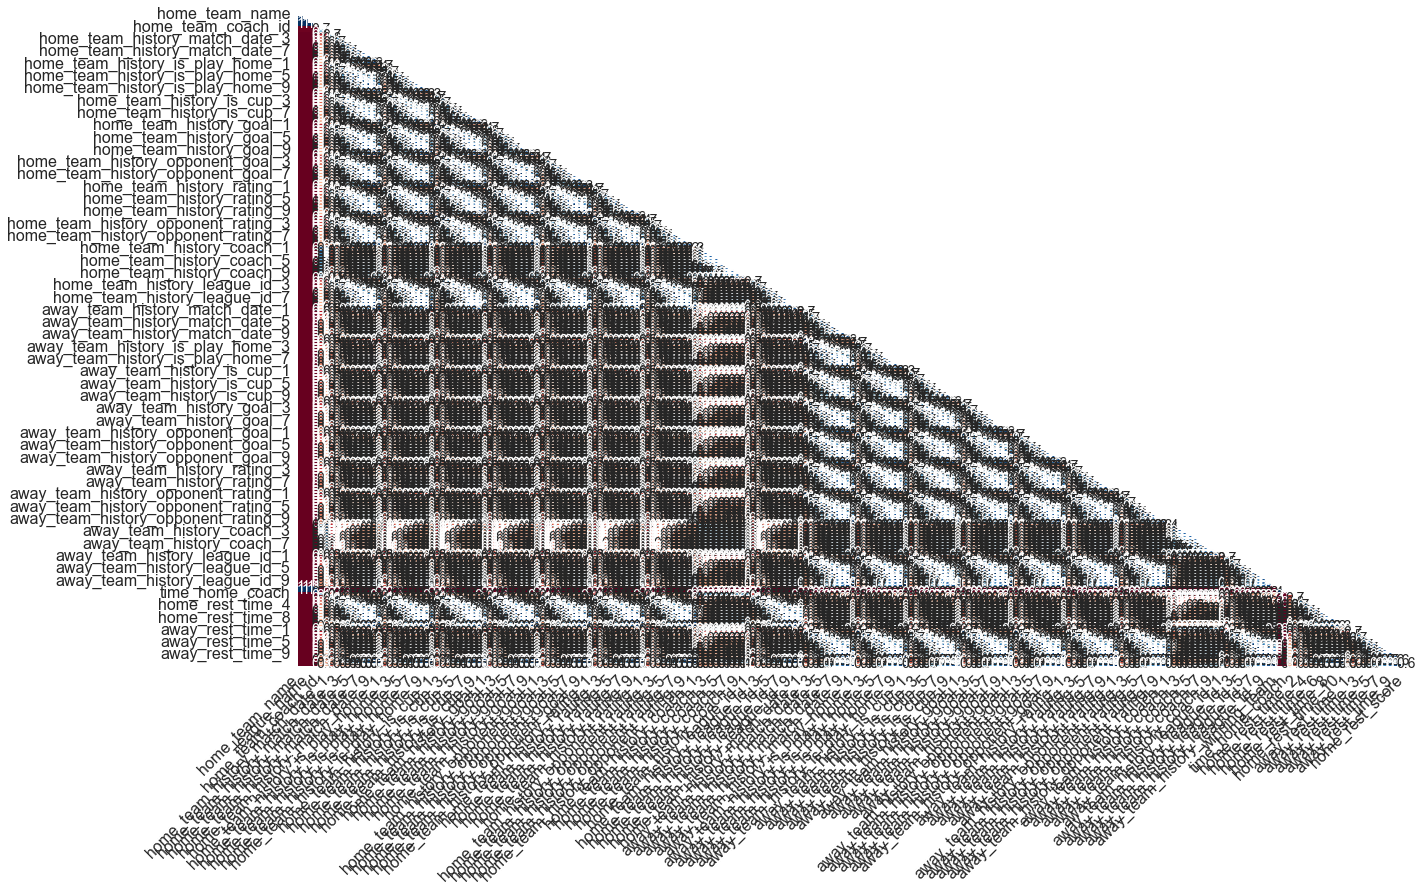

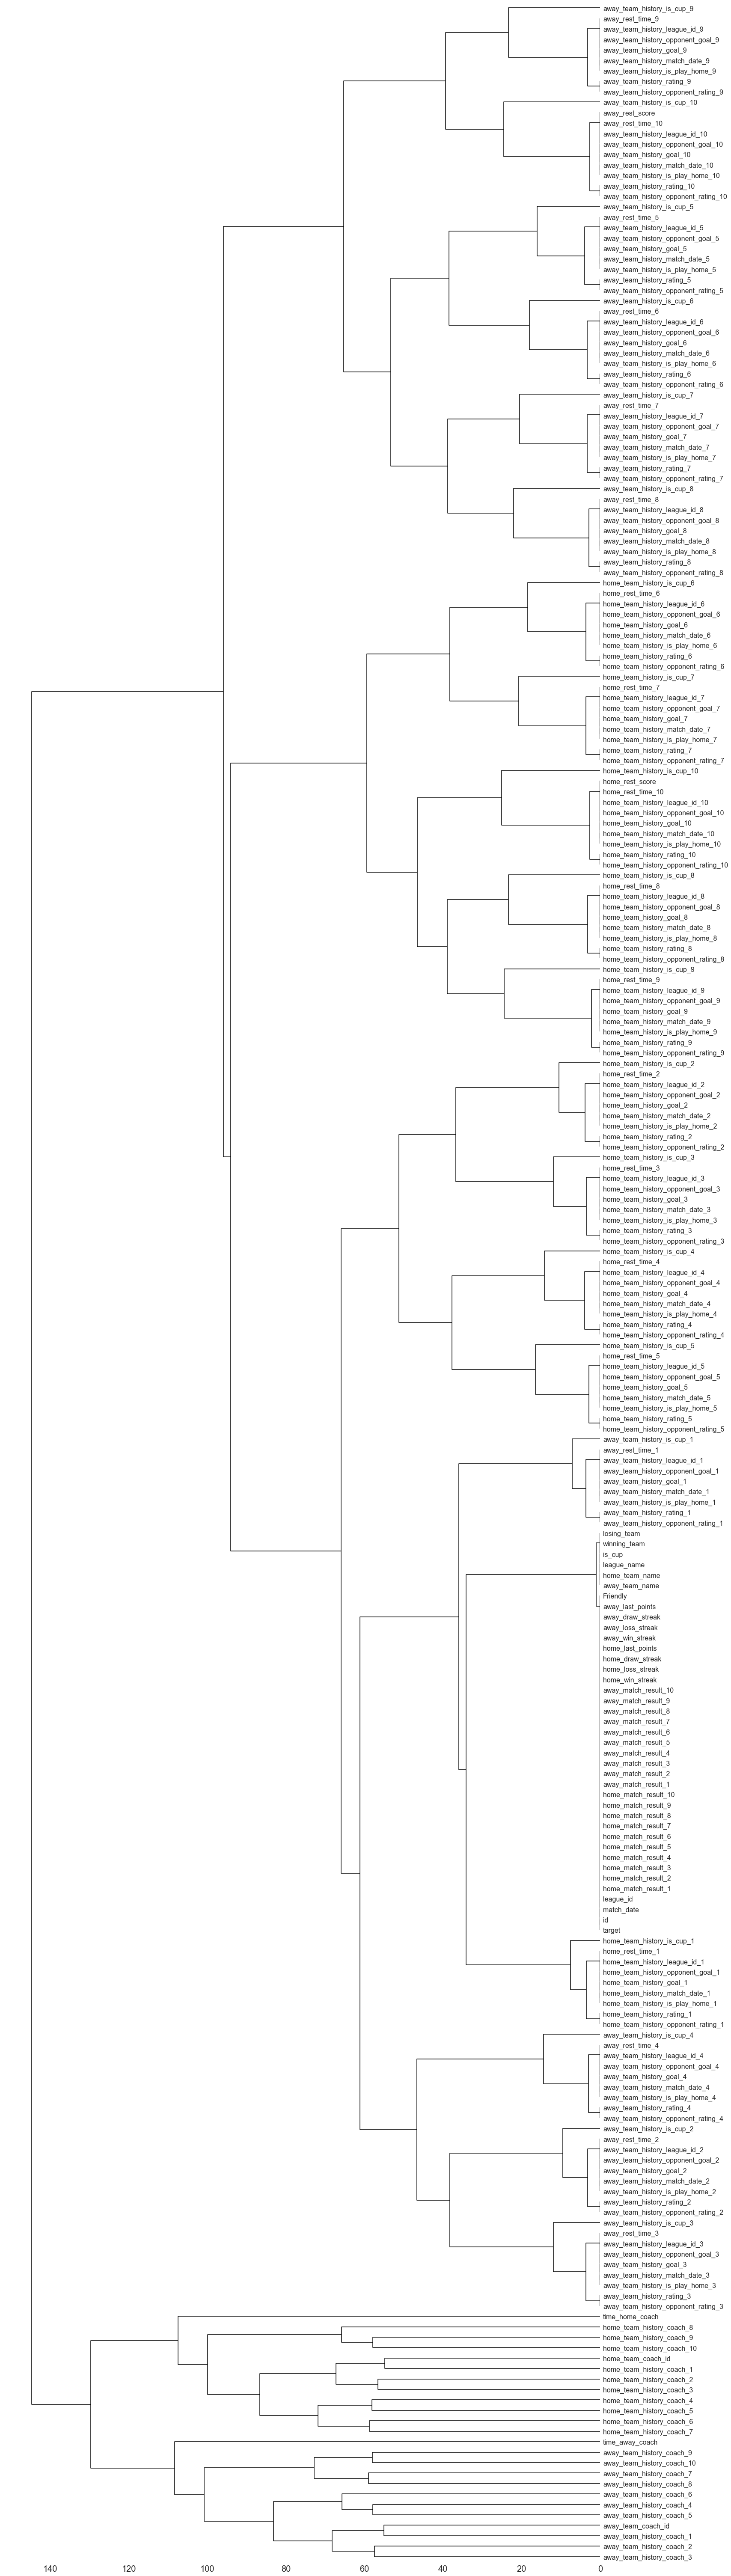

In [19]:
# - General look at the missing data using missigno library
import missingno as msno

msno.matrix(df_train) # Matrix of NaN - easy to see if there are any missing data and if there is a pattern
plt.show()
msno.heatmap(df_train) # Correlation between the Null variables of each column
plt.show()
msno.dendrogram(df_train) # Easy to visualize, correlation between null of each column
plt.show()

In [20]:
pd.set_option('display.max_rows', None)
df_train.isna().sum()

id                                          0
target                                      0
home_team_name                              1
away_team_name                              1
match_date                                  0
league_name                                 1
league_id                                   0
is_cup                                      1
home_team_coach_id                      21721
away_team_coach_id                      21815
home_team_history_match_date_1           1159
home_team_history_match_date_2           2451
home_team_history_match_date_3           3773
home_team_history_match_date_4           5101
home_team_history_match_date_5           6477
home_team_history_match_date_6           7896
home_team_history_match_date_7           9295
home_team_history_match_date_8          10719
home_team_history_match_date_9          12136
home_team_history_match_date_10         13559
home_team_history_is_play_home_1         1159
home_team_history_is_play_home_2  

<h1>4. Final adjustment before training</h1>
<ul>
<li>Choisir les variables sur lesquelles nous allons nous entraîner</li>
<li>Remplir les valeurs manquantes</li>
<li>La transformation logarithmique sur l'historique des évaluations et le score de repos ont tous deux une distribution asymétrique droite.</li>
<li>Division de l'ensemble de données en variables et cible</li>
<li>Mise à l'échelle des variables (x)</li>
</ul>

In [21]:
# Function to adjust the skeweness and missing value of variables
def df_adjustment(df, df_type='train'):
    new_df = df.copy()
    
    if df_type=='train':
        features = ['target','is_cup',
                   'home_team_history_rating_1','home_team_history_rating_2','home_team_history_rating_3','home_team_history_rating_4','home_team_history_rating_5','home_team_history_rating_6','home_team_history_rating_7','home_team_history_rating_8','home_team_history_rating_9','home_team_history_rating_10',
                  'home_team_history_opponent_rating_1','home_team_history_opponent_rating_2','home_team_history_opponent_rating_3','home_team_history_opponent_rating_4','home_team_history_opponent_rating_5','home_team_history_opponent_rating_6','home_team_history_opponent_rating_7','home_team_history_opponent_rating_8','home_team_history_opponent_rating_9','home_team_history_opponent_rating_10',
                  'away_team_history_rating_1','away_team_history_rating_2','away_team_history_rating_3','away_team_history_rating_4','away_team_history_rating_5','away_team_history_rating_6','away_team_history_rating_7','away_team_history_rating_8','away_team_history_rating_9','away_team_history_rating_10', 'away_team_history_opponent_rating_1','away_team_history_opponent_rating_2','away_team_history_opponent_rating_3','away_team_history_opponent_rating_4','away_team_history_opponent_rating_5','away_team_history_opponent_rating_6','away_team_history_opponent_rating_7','away_team_history_opponent_rating_8','away_team_history_opponent_rating_9','away_team_history_opponent_rating_10',
                  'time_home_coach','time_away_coach','home_rest_score','away_rest_score',
                  'home_win_streak','away_win_streak','home_loss_streak','away_loss_streak','home_draw_streak','away_draw_streak',
                  'home_last_points', 'away_last_points',
                  'Friendly']
    else:
        features = ['is_cup',
                   'home_team_history_rating_1','home_team_history_rating_2','home_team_history_rating_3','home_team_history_rating_4','home_team_history_rating_5','home_team_history_rating_6','home_team_history_rating_7','home_team_history_rating_8','home_team_history_rating_9','home_team_history_rating_10',
                  'home_team_history_opponent_rating_1','home_team_history_opponent_rating_2','home_team_history_opponent_rating_3','home_team_history_opponent_rating_4','home_team_history_opponent_rating_5','home_team_history_opponent_rating_6','home_team_history_opponent_rating_7','home_team_history_opponent_rating_8','home_team_history_opponent_rating_9','home_team_history_opponent_rating_10',
                  'away_team_history_rating_1','away_team_history_rating_2','away_team_history_rating_3','away_team_history_rating_4','away_team_history_rating_5','away_team_history_rating_6','away_team_history_rating_7','away_team_history_rating_8','away_team_history_rating_9','away_team_history_rating_10','away_team_history_opponent_rating_1','away_team_history_opponent_rating_2','away_team_history_opponent_rating_3','away_team_history_opponent_rating_4','away_team_history_opponent_rating_5','away_team_history_opponent_rating_6','away_team_history_opponent_rating_7','away_team_history_opponent_rating_8','away_team_history_opponent_rating_9','away_team_history_opponent_rating_10',
                  'time_home_coach','time_away_coach','home_rest_score','away_rest_score',
                  'home_win_streak','away_win_streak','home_loss_streak','away_loss_streak','home_draw_streak','away_draw_streak',
                  'home_last_points', 'away_last_points',
                  'Friendly']
    new_df = new_df.loc[:,features]
    
    # missing is_cup values equals to 0 -> most of matches are not cup
    new_df['is_cup'] = new_df['is_cup'].fillna(0)
    
    for h_a in ['home','away']:
        # time of coach on team will be +11 matches as is the most commom value
        new_df['time_{}_coach'.format(h_a)] = new_df['time_{}_coach'.format(h_a)].fillna(11)
        # rest_score is filled with the median value
        new_df['{}_rest_score'.format(h_a)] =  np.log(new_df['{}_rest_score'.format(h_a)].fillna(new_df['{}_rest_score'.format(h_a)].median()))
        for hist in range(1,11):
            # rating values will be first grouped by team and if is played in home
            new_df['{}_team_history_rating_{}'.format(h_a,hist)] = new_df['{}_team_history_rating_{}'.format(h_a,hist)].fillna(df.groupby(['{}_team_name'.format(h_a),'{}_team_history_is_play_home_1'.format(h_a)])['{}_team_history_rating_1'.format(h_a)].transform('median'))
            new_df['{}_team_history_opponent_rating_{}'.format(h_a,hist)] = new_df['{}_team_history_opponent_rating_{}'.format(h_a,hist)].fillna(df.groupby(['{}_team_name'.format(h_a),'{}_team_history_is_play_home_1'.format(h_a)])['{}_team_history_opponent_rating_1'.format(h_a)].transform('median'))
             # the still missing values are completed with the median value of all ratings
            new_df['{}_team_history_rating_{}'.format(h_a,hist)] =  np.log(new_df['{}_team_history_rating_{}'.format(h_a,hist)].fillna(df['{}_team_history_rating_1'.format(h_a)].median()))
            new_df['{}_team_history_opponent_rating_{}'.format(h_a,hist)] =  np.log(new_df['{}_team_history_opponent_rating_{}'.format(h_a,hist)].fillna(df['{}_team_history_opponent_rating_1'.format(h_a)].median()))
    return new_df

In [22]:
# Dividing the dataset into variables and target
mod_df = df_adjustment(df_train)

x = mod_df.drop(columns=['target'])
y = mod_df.loc[:,'target']

In [23]:
# Scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [24]:
x.head()

is_cup  home_team_history_rating_1  home_team_history_rating_2  \
0 -0.298587                   -1.181435                   -0.236382   
1 -0.298587                    2.340685                   -0.117773   
2 -0.298587                   -0.076209                    1.280007   
3 -0.298587                    0.048145                   -0.169400   
4 -0.298587                    0.182637                    0.580870   

   home_team_history_rating_3  home_team_history_rating_4  \
0                   -0.949598                    0.227224   
1                    1.133149                   -0.206297   
2                   -0.191169                    0.350390   
3                    0.851913                    0.858522   
4                   -0.376685                    0.528152   

   home_team_history_rating_5  home_team_history_rating_6  \
0                   -0.312547                   -0.137879   
1                    0.688325                    0.261936   
2                   -1.299699                    0.722359   
3                    0.020840                    0.781695   
4                   -0.654678                    1.615094   

   home_team_history_rating_7  home_team_history_rating_8  \
0                   -1.482958                    0.743354   
1                    0.049794                    2.061804   
2                   -0.786760                    2.103901   
3                   -0.158695                    1.601094   
4                   -0.178459                    0.409045   

   home_team_history_rating_9  home_team_history_rating_10  \
0                   -0.997758                     0.425807   
1                    0.879775                     0.827297   
2                   -0.529453                    -0.078650   
3                    0.485011                     0.759558   
4                   -0.231674                     1.385726   

   home_team_history_opponent_rating_1  home_team_history_opponent_rating_2  \
0                            -0.571955                            -1.379195   
1                            -1.581048                             0.052240   
2                             0.216746                            -1.116232   
3                            -0.157494                             0.006880   
4                            -0.390559                            -0.608572   

   home_team_history_opponent_rating_3  home_team_history_opponent_rating_4  \
0                            -0.521067                            -1.840063   
1                            -1.770251                            -0.152294   
2                            -0.431426                            -0.720867   
3                            -0.892609                            -0.582280   
4                             0.058577                            -1.072208   

   home_team_history_opponent_rating_5  home_team_history_opponent_rating_6  \
0                            -1.173247                            -1.286788   
1                            -1.146616                            -1.057582   
2                             0.684432                            -1.095778   
3                            -0.127144                            -0.972059   
4                             0.560738                            -2.035681   

   home_team_history_opponent_rating_7  home_team_history_opponent_rating_8  \
0                             0.649715                            -2.187037   
1                            -0.441060                            -1.956487   
2                             0.501900                            -1.456580   
3                            -0.147433                            -2.843550   
4                            -0.035430                            -0.860662   

   home_team_history_opponent_rating_9  home_team_history_opponent_rating_10  \
0                            -0.698023                             -1.665372   
1                            -0.245219      

In [25]:
len(x.columns)

54

In [26]:
# Creating and training our model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.001,penalty='l2',solver='lbfgs')
model.fit(x,y)

LogisticRegression(C=0.001)

In [27]:
# Preparing the test dataset

test_df_mod = new_variables(df_test, 'test')
test_df_mod2 = df_adjustment(test_df_mod,'test')
test_df_ok = pd.DataFrame(scaler.transform(test_df_mod2),columns=test_df_mod2.columns)


In [28]:
test_df_ok.head()

is_cup  home_team_history_rating_1  home_team_history_rating_2  \
0 -0.298587                   -0.987607                   -0.309195   
1 -0.298587                   -0.363558                    0.291559   
2 -0.298587                   -0.664945                   -1.571290   
3 -0.298587                   -0.294381                   -0.924503   
4 -0.298587                   -1.229521                   -2.011901   

   home_team_history_rating_3  home_team_history_rating_4  \
0                   -0.780902                   -0.953903   
1                    0.032976                   -0.845767   
2                   -0.602252                   -1.427536   
3                   -0.868783                   -1.951676   
4                    0.666525                   -0.846139   

   home_team_history_rating_5  home_team_history_rating_6  \
0                   -1.345668                   -0.799717   
1                    0.321747                   -0.630175   
2                   -2.011345                   -0.200029   
3                   -0.120458                   -0.765417   
4                   -0.609432                   -0.843333   

   home_team_history_rating_7  home_team_history_rating_8  \
0                   -0.753908                   -1.071817   
1                   -1.346332                   -0.736349   
2                   -0.909992                   -0.613120   
3                   -0.951431                   -1.268036   
4                   -0.154309                    0.607914   

   home_team_history_rating_9  home_team_history_rating_10  \
0                   -0.961011                    -0.452185   
1                   -0.880679                    -0.961429   
2                   -0.468187                    -0.862511   
3                   -0.390280                    -1.217374   
4                   -1.249913                    -0.585660   

   home_team_history_opponent_rating_1  home_team_history_opponent_rating_2  \
0                             0.474670                             0.012199   
1                             0.092562                            -0.393917   
2                            -0.438964                             0.507741   
3                             0.032158                             0.312541   
4                             0.530466                             1.008526   

   home_team_history_opponent_rating_3  home_team_history_opponent_rating_4  \
0                             0.666787                             0.032265   
1                            -0.696991                             1.427628   
2                            -0.109818                             0.656963   
3                             0.091794                             0.720818   
4                            -1.347079                            -0.171411   

   home_team_history_opponent_rating_5  home_team_history_opponent_rating_6  \
0                             1.540948                             0.476557   
1                            -0.177030                             0.580977   
2                             0.938873                            -0.223100   
3                            -0.959003                            -0.244411   
4                            -0.012800                             0.119453   

   home_team_history_opponent_rating_7  home_team_history_opponent_rating_8  \
0                             0.210499                             0.705793   
1                             0.444699                            -0.387946   
2                             0.192852                             0.457982   
3                             0.601738                             0.618619   
4                            -0.468839                            -1.269444   

   home_team_history_opponent_rating_9  home_team_history_opponent_rating_10  \
0                             0.599842                              0.407985   
1                            -0.088674      

In [29]:
predictions = model.predict_proba(test_df_ok)
predictions
submission = pd.concat([pd.DataFrame(df_test.id),pd.DataFrame(predictions,columns=['away','draw','home'])[['home', 'draw','away']]],axis=1).set_index('id')
submission.to_csv('submission.csv')

In [30]:
import pickle as pkl

with open('model.pkl', 'wb') as f:
    pkl.dump(model, f)

In [31]:
import pickle as pkl

with open('model.pkl', 'rb') as f:
    md= pkl.load(f)

In [32]:
nb=md.predict_proba(test_df_ok)
nb

array([[0.31667894, 0.30037782, 0.38294324],
       [0.36820118, 0.28444055, 0.34735828],
       [0.34154863, 0.28985616, 0.36859522],
       ...,
       [0.52919771, 0.27139222, 0.19941007],
       [0.19657948, 0.27433718, 0.52908335],
       [0.28111444, 0.30370655, 0.41517901]])

In [33]:
df_sub = pd.DataFrame({
    'id': df_test['id'],
    'away': predictions[:, 0],
    'draw': predictions[:, 1],
    'home': predictions[:, 2]
})
df_sub.head()


id      away      draw      home
0  17761448  0.316679  0.300378  0.382943
1  17695487  0.368201  0.284441  0.347358
2  17715496  0.341549  0.289856  0.368595
3  17715493  0.544543  0.259725  0.195732
4  17715492  0.231185  0.293348  0.475468

In [35]:
df_sub.shape

(72711, 4)

In [36]:
# maps
target2int = {'away': 0, 'draw': 1, 'home': 2}
int2target = {x[1]: x[0] for x in target2int.items()}

# encode target
df_train['target_int'] = df_train['target'].map(target2int)

In [37]:
pd.concat([
   df_train['target_int'].value_counts(normalize=True).sort_index().rename('observed'),
    pd.Series(np.argmax(df_sub.iloc[:, 1:].values, axis=1), name='predicted').value_counts(normalize=True).sort_index()
], axis=1)

observed  predicted
0  0.317060   0.320818
1  0.249247   0.009806
2  0.433693   0.669376

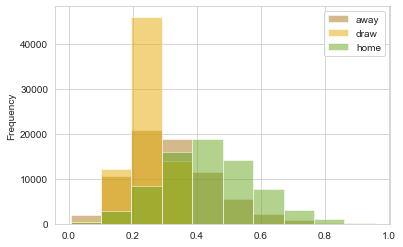

In [41]:
df_sub.iloc[:, 1:].plot.hist(alpha=0.5);

   <h2 style="font-family:Serif; color:#d63031; font-size:27px; margin-bottom:0">Application Web </h2>

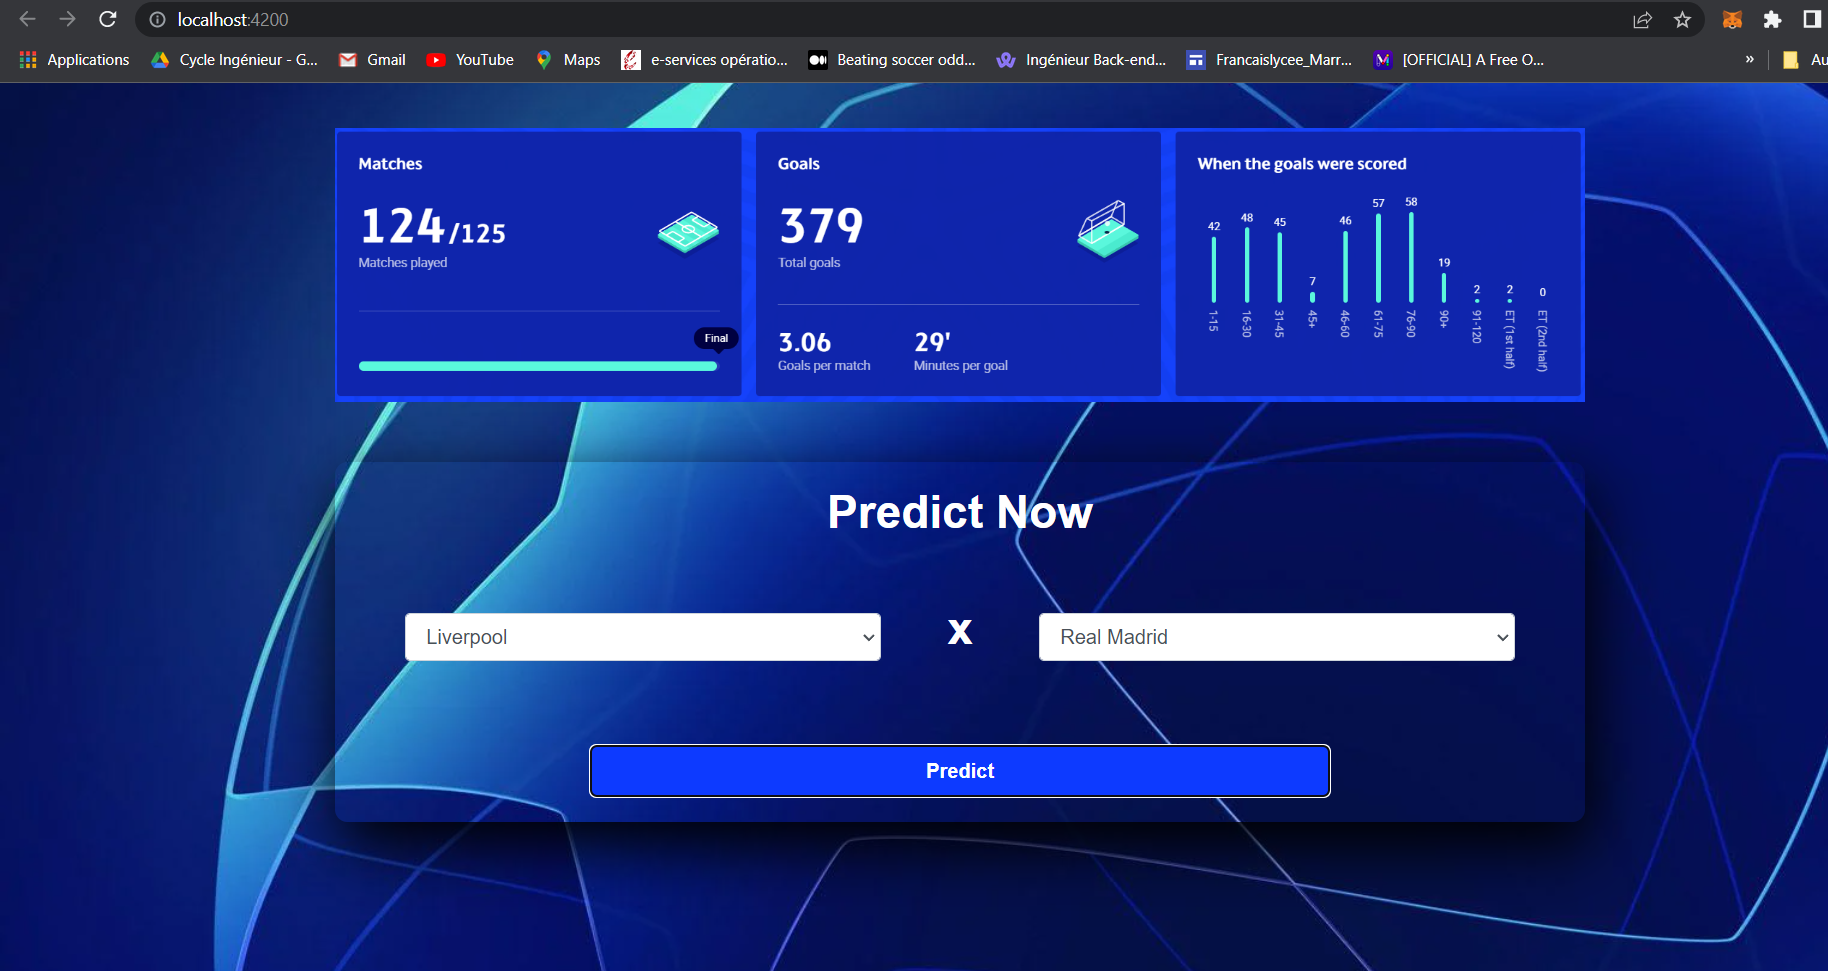

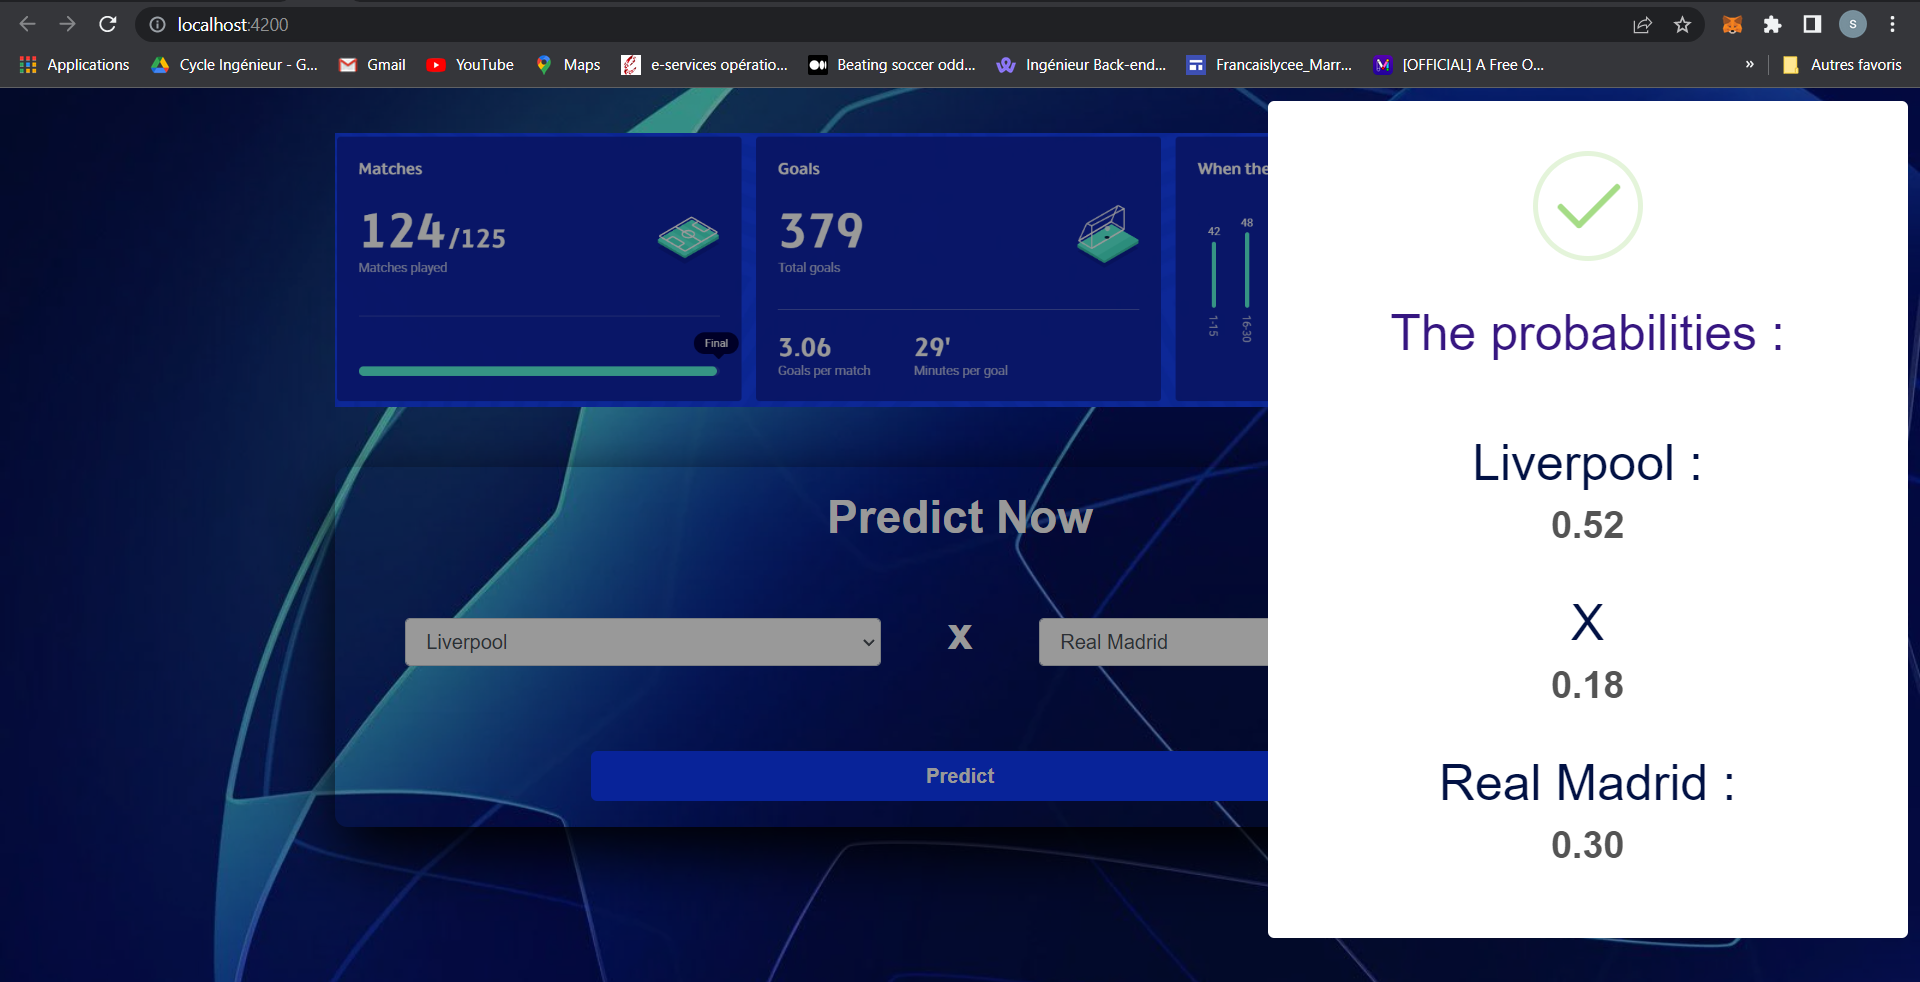

https://github.com/ElabdiAchraf/football-prediction.git